# Hồi quy tuyến tính

Tập tin ‘IQ6.xls’ chứa dữ liệu huấn luyện về mối quan hệ giữa chỉ số IQ với điểm thi của các môn học.

3.1) Vẽ biểu đồ phân phối và cho biết những giá trị thống kê cơ bản của điểm thi các môn. Xác định outlier(s), nếu có, của chỉ số IQ và của điểm thi các môn dựa trên quy tắc 3-Sigma.

3.2) Tính hệ số tương quan Pearson giữa IQ và các điểm thi. Trên cơ sở đó, chọn điểm thi của 1 trong các môn để dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính dựa trên a) Gradient Descent VÀ b) Công thức hiệp phương sai. Trực quan hóa dữ liệu.

3.3) Dự đoán chỉ số IQ cho tập dữ liệu thử nghiệm (test set): { 0.5, 1.0, 1.5, 2.0, ..., 9.0, 9.5, 10 }.

3.4) Nhận xét kết quả khi dùng diem_5 để dự đoán chỉ số IQ.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%pwd
%ls
%cd 
%ls

In [2]:
import os
path = "/content/drive/My Drive/bai_thi_lds3/LDS3. De thi cuoi khoa K274/"
folder = "Data/"
os.chdir(path)
files = os.listdir(folder)
print(files)

['Duong_huyet_SAU.txt', 'Duong_huyet_TRUOC.txt', 'Samples.txt', 'Breast Cancer WI.csv', 'IQ6.xls']


In [3]:
#Import các thư viện cần thiết
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import scale
import scipy
from sklearn.decomposition import PCA

In [4]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
### CAU 3 - HOI QUY TUYEN TINH ###
data_2 = pd.read_excel(folder+files[4])
data_2

,stt,diem_1,diem_2,diem_3,diem_4,diem_5,diem_6,IQ
0,1,8,2.0,7.0,7,1.4,8.0,68
1,2,8,8.4,6.4,8,4.0,1.6,137
2,3,7,7.6,7.8,8,5.2,2.4,135
3,4,8,7.0,2.5,6,6.4,7.0,79
4,5,8,4.4,3.8,6,1.0,5.6,107
5,6,8,6.4,7.2,7,5.6,3.6,128
6,7,7,8.0,8.4,8,4.4,2.0,120
7,8,8,2.8,6.8,6,0.4,7.2,74
8,9,6,5.2,5.0,7,5.0,4.8,110
9,10,8,6.4,8.9,7,2.4,3.6,134


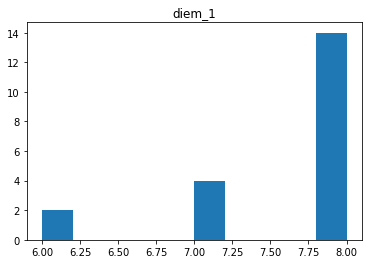

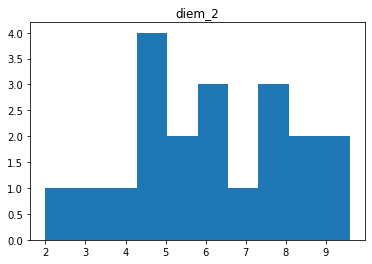

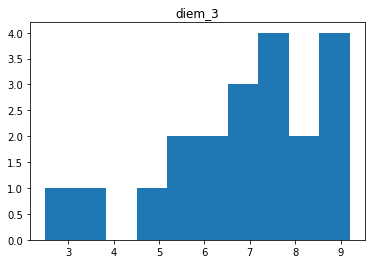

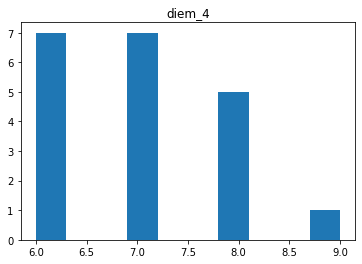

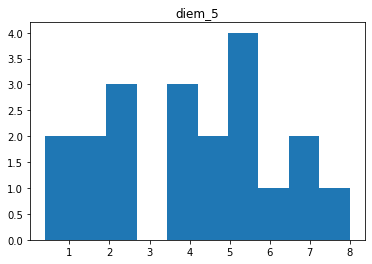

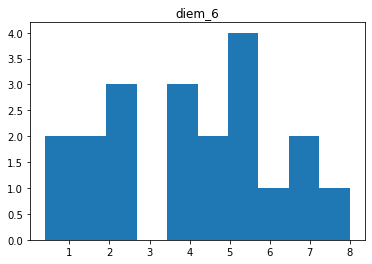

In [6]:
#Phan phoi diem so cac mon
for i in data_2.columns[1:7]:
  plt.hist(data_2[i])
  plt.title(i)
  plt.show()

In [7]:
#Nhung gia tri thong ke co ban cua diem thi cac mon
data_2[data_2.columns[1:7]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diem_1,20.0,7.60,0.680557,6.0,7.000,8.0,8.000,8.0
diem_2,20.0,6.12,2.115009,2.0,4.700,6.2,7.700,9.6
diem_3,20.0,6.86,1.793380,2.5,6.075,7.1,8.175,9.2
diem_4,20.0,7.00,0.917663,6.0,6.000,7.0,8.000,9.0
diem_5,20.0,4.08,2.214212,0.4,2.300,4.2,5.600,8.0
diem_6,20.0,4.08,2.214212,0.4,2.300,4.2,5.600,8.0


In [8]:
#Kiem tra xem co outlier voi quy tac 3 sigma hay khong
from scipy import stats
df = pd.DataFrame(stats.zscore(data_2[data_2.columns[1:]]))
df.columns = data_2.columns[1:]
print(df)
print("Kiem tra xem co gia tri nao co Z-score lon hon 3 hay khong")
print(abs(df)>3)
print(np.any(abs(df)>3))

      diem_1    diem_2    diem_3    diem_4    diem_5    diem_6        IQ
0   0.603023 -1.998588  0.080093  0.000000 -1.241806  1.816373 -2.173569
1   0.603023  1.106014 -0.263162  1.118034 -0.037069 -1.149134  1.003894
2  -0.904534  0.717939  0.537767  1.118034  0.518964 -0.778445  0.911794
3   0.603023  0.426883 -2.494322 -1.118034  1.074996  1.353012 -1.667017
4   0.603023 -0.834362 -1.750602 -1.118034 -1.427150  0.704308 -0.377612
5   0.603023  0.135826  0.194511  0.000000  0.704308 -0.222413  0.589443
6  -0.904534  0.911977  0.881022  1.118034  0.148275 -0.963790  0.221041
7   0.603023 -1.610512 -0.034326 -1.118034 -1.705166  1.445684 -1.897268
8  -2.412091 -0.446287 -1.064091  0.000000  0.426292  0.333619 -0.239461
9   0.603023  0.135826  1.167068  0.000000 -0.778445 -0.222413  0.865744
10  0.603023  0.717939  1.338696  0.000000 -0.222413 -0.778445  1.095995
11 -0.904534 -0.543305 -0.835254  0.000000  0.333619  0.426292 -0.239461
12  0.603023  1.688127  1.052649  2.236068  1.44568

Các Outlier có thể làm nhiễu việc kết quả ước lượng. Việc tìm ra chúng và xử lý là cần thiết trong quá trình xử lý dữ liệu.

Có nhiều cách để tìm ra được các Outlier, trong đó giá trị Z-score thường được áp dụng.

Kết quả trng bảng chỉ ra cho thấy không tồn tại tại giá trị nào có Z-score lớn hơn 3 hoặc nhỏ hơn -3, như vậy dữ liệu không có outlier nào với quy tắc 3 sigma.

In [9]:
#He so tuong quan giua IQ va diem so cac mon
corr_ = data_2[data_2.columns[1:]].corr()["IQ"]
print("He so tuong quan giua IQ va diem so cac mon")
corr_

He so tuong quan giua IQ va diem so cac mon


diem_1   -0.088168
diem_2    0.751607
diem_3    0.471522
diem_4    0.622977
diem_5    0.439858
diem_6   -0.872419
IQ        1.000000
Name: IQ, dtype: float64

In [10]:
#Du bao theo hiep phuong sai
def predict_cov(X,y):
  mean_x  = np.mean(X)
  delta_x = (X - mean_x).flatten()

  mean_y  = np.mean(y)
  delta_y = (y - mean_y).flatten()

  numerator   = delta_x.dot(delta_y.T)
  denominator = delta_x.dot(delta_x.T)

  ## Vector tham số
  slope4      = numerator/denominator
  bias4       = mean_y - (slope4 * mean_x)
  print('   IQ = (', slope4, ') * diem_2 + (', bias4, ')\n')
  return (slope4, bias4)

slope, bias = predict_cov(data_2["diem_2"].values, data_2["IQ"].values)
cov_predict = data_2["diem_2"].values*slope + bias
cov_predict



   IQ = ( 7.917451054216866 ) * diem_2 + ( 66.74519954819279 )



array([ 82.58010166, 133.2517884 , 126.91782756, 122.16735693,
       101.58198419, 117.4168863 , 130.08480798,  88.9140625 ,
       107.91594503, 117.4168863 , 126.91782756, 106.33245482,
       142.75272967, 111.08292545, 101.58198419, 138.00225904,
        95.24802334, 104.74896461, 114.24990587, 134.83527861])

In [11]:
#Du bao theo Gradien Descent
def gradient_descent_2(alpha, x, y, numIterations):
  # x = [[1 x0],[1 x1], [1 x2]...]
  m = x.shape[0] # number of samples
  theta = np.ones(2)
  for iter in range(0, numIterations):
    # hypothesis = theta0 + theta1.x ~ x.dot(theta) ~ (1 x).dot (theta0 theta
    hypothesis = np.dot(x, theta)
    loss = hypothesis - y
    J = np.sum(loss ** 2) / (2 * m) # cost
    theta0_prime = np.sum(loss)/m
    theta1_prime = np.sum(loss * x[:,1])/m
    gradient = np.array([theta0_prime, theta1_prime])
    theta = theta - alpha * gradient # update
    # lan lap dau tien
  return theta
X = np.c_[ np.ones(len(data_2)), data_2["diem_2"].values]
theta = gradient_descent_2(0.01, X, data_2["IQ"], 1000)
GD_predict = data_2["diem_2"]*theta[1] + theta[0]
GD_predict

0      66.095950
1     138.755297
2     129.672879
3     122.861065
4      93.343205
5     116.049251
6     134.214088
7      75.178369
8     102.425624
9     116.049251
10    129.672879
11    100.155019
12    152.378925
13    106.966833
14     93.343205
15    145.567111
16     84.260787
17     97.884415
18    111.508042
19    141.025902
Name: diem_2, dtype: float64

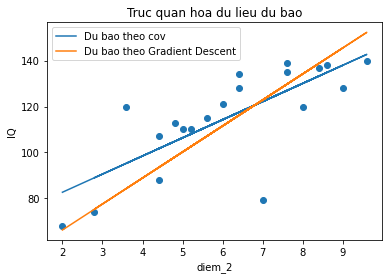

In [12]:
#Truc quan hoa du lieu
plt.scatter(data_2["diem_2"], data_2["IQ"])
plt.plot(data_2["diem_2"], cov_predict, label="Du bao theo cov")
plt.plot(data_2["diem_2"], GD_predict, label="Du bao theo Gradient Descent")
plt.xlabel("diem_2")
plt.ylabel("IQ")
plt.legend()
plt.title("Truc quan hoa du lieu du bao")
plt.show()


In [13]:
# Dự đoán chỉ số IQ cho tập dữ liệu thử nghiệm (test set): { 0.5, 1.0, 1.5, 2.0, ..., 9.0, 9.5, 10 }.
test_set = {0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0,
            5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.}
print("Du bao theo covariance: ")
for i in test_set:
  print(i*slope+bias)
print("Du bao theo Gradien Descent: ")
for i in test_set:
  print(i*theta[1]+theta[0])


Du bao theo covariance: 
70.70392507530121
74.66265060240966
82.58010165662652
86.53882718373495
78.62137612951808
90.4975527108434
94.45627823795182
98.41500376506025
102.37372929216869
106.33245481927712
110.29118034638554
114.24990587349399
118.20863140060243
122.16735692771084
126.12608245481928
130.08480798192772
134.04353350903614
138.00225903614458
141.96098456325302
145.91971009036143
Du bao theo Gradien Descent: 
49.06641607464427
54.742927536424254
66.09595045998421
71.77246192176418
60.41943899820423
77.44897338354416
83.12548484532414
88.8019963071041
94.47850776888409
100.15501923066407
105.83153069244403
111.50804215422401
117.184553616004
122.86106507778398
128.53757653956393
134.21408800134392
139.89059946312392
145.5671109249039
151.24362238668385
156.92013384846382


   IQ = ( 4.425884575747165 ) * diem_2 + ( 97.14239093095156 )



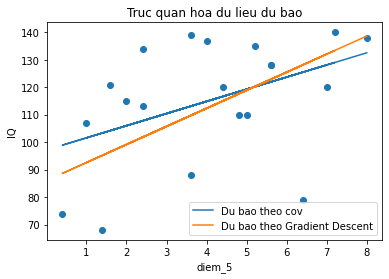

In [14]:
# Nhận xét kết quả khi dùng diem_5 để dự đoán chỉ số IQ.
slope, bias = predict_cov(data_2["diem_5"].values, data_2["IQ"].values)
cov_predict5 = data_2["diem_5"].values*slope + bias
theta5 = gradient_descent_2(0.01, np.c_[np.ones(len(data_2)), data_2["diem_5"].values], np.array(data_2["IQ"].values), 1000)
GD_predict5 = theta5[1]*data_2["diem_5"]+theta5[0]
#Truc quan hoa du lieu
plt.scatter(data_2["diem_5"], data_2["IQ"])
plt.plot(data_2["diem_5"], cov_predict5, label="Du bao theo cov")
plt.plot(data_2["diem_5"], GD_predict5, label="Du bao theo Gradient Descent")
plt.xlabel("diem_5")
plt.ylabel("IQ")
plt.legend()
plt.title("Truc quan hoa du lieu du bao")
plt.show()


Những giá trị thực tế khá xa đường dự báo. Như vậy diem_5 không tốt so với những biến khác để dự báo cho IQ theo hiệp phương sai.